In [1]:
import os
os.chdir('../')

In [2]:
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
import config

In [4]:
params = config.Config()

In [5]:
path_csv = 'data/global_power_plant_database_v_1_3/global_power_plant_database.csv'

In [6]:
cols = [
    'country',
    'country_long',
    'name',
    'capacity_mw',
    'latitude',
    'longitude',
    'primary_fuel'
]

In [33]:
data_csv = pd.read_csv(path_csv, usecols=cols)
data_csv['capacity_mw_size'] = data_csv['capacity_mw']/50

In [34]:
data_csv.head()

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,capacity_mw_size
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,0.66
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,0.20
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,0.20
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,1.32
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,2.00


In [58]:
plant_counter = data_csv.groupby('primary_fuel').count()['country'].reset_index()

In [59]:
plant_counter

,primary_fuel,country
0,Biomass,1430
1,Coal,2330
2,Cogeneration,41
3,Gas,3998
4,Geothermal,189
5,Hydro,7156
6,Nuclear,195
7,Oil,2320
8,Other,43
9,Petcoke,12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Biomass'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Cogeneration'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Geothermal'),
  Text(5, 0, 'Hydro'),
  Text(6, 0, 'Nuclear'),
  Text(7, 0, 'Oil'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'Petcoke'),
  Text(10, 0, 'Solar'),
  Text(11, 0, 'Storage'),
  Text(12, 0, 'Waste'),
  Text(13, 0, 'Wave and Tidal'),
  Text(14, 0, 'Wind')])

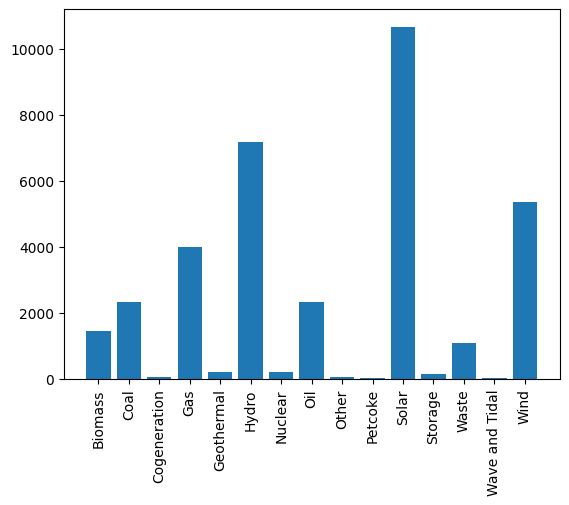

In [61]:
plt.bar(x=plant_counter.primary_fuel.values, 
        height=plant_counter.country.values,
        )
plt.xticks(rotation='vertical')

In [36]:
capacity_mw = list(data_csv.capacity_mw.values)

<BarContainer object of 10 artists>

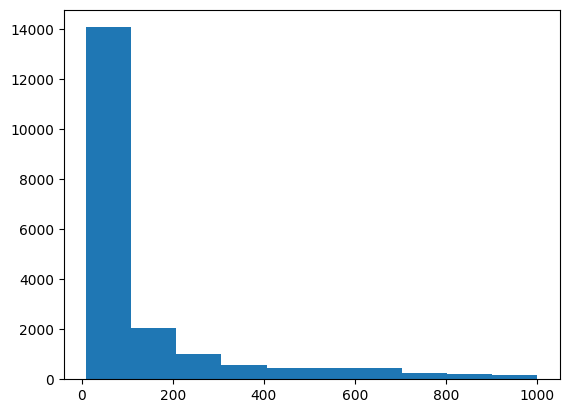

In [37]:
plt.hist(capacity_mw, range=[10, 1000])[2]

In [38]:
mapbox_token = 'pk.eyJ1IjoibWFuaXNoc2FodTUzc2FodSIsImEiOiJjbGM2am51ZDMwd3U2M3ZwNmR6dTQ1MDVpIn0.FT-qhWiG132oOfezigPMOQ'

In [39]:

px.set_mapbox_access_token(mapbox_token)

In [40]:
df = px.data.carshare()
df.head(2)

,centroid_lat,centroid_lon,car_hours,peak_hour
0,45.471549,-73.588684,1772.750000,2
1,45.543865,-73.562456,986.333333,23


In [41]:
data_csv.head(2)

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,capacity_mw_size
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.119,Hydro,0.66
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.795,Solar,0.20


In [48]:
fig = px.scatter_mapbox(data_csv, 
                        lat="latitude", lon="longitude", 
                        color="primary_fuel", size="capacity_mw_size",
                        color_discrete_sequence=px.colors.qualitative.Alphabet,
                        # color_continuous_scale=px.colors.sequential.Jet, 
                        size_max=25, zoom=2)
fig.show()

In [19]:
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()